In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

result_folder = ".\\others\\"

result_csv_filename = list(filter(lambda x: '.csv' in x, os.listdir(result_folder)))

In [2]:
dataframe = {}
name = []
for file in result_csv_filename:
    data = pd.read_csv(result_folder + file)
    name.append(file[:-4])
    for index, load in enumerate(list(data["laNet"])):
        if load not in dataframe.keys():
            dataframe.update({load: []})
            dataframe[load].append(data["pbReq"][index])
        else:
            dataframe[load].append(data["pbReq"][index])

In [3]:
dataframe = pd.DataFrame(dataframe).T

In [4]:
dataframe.columns = name

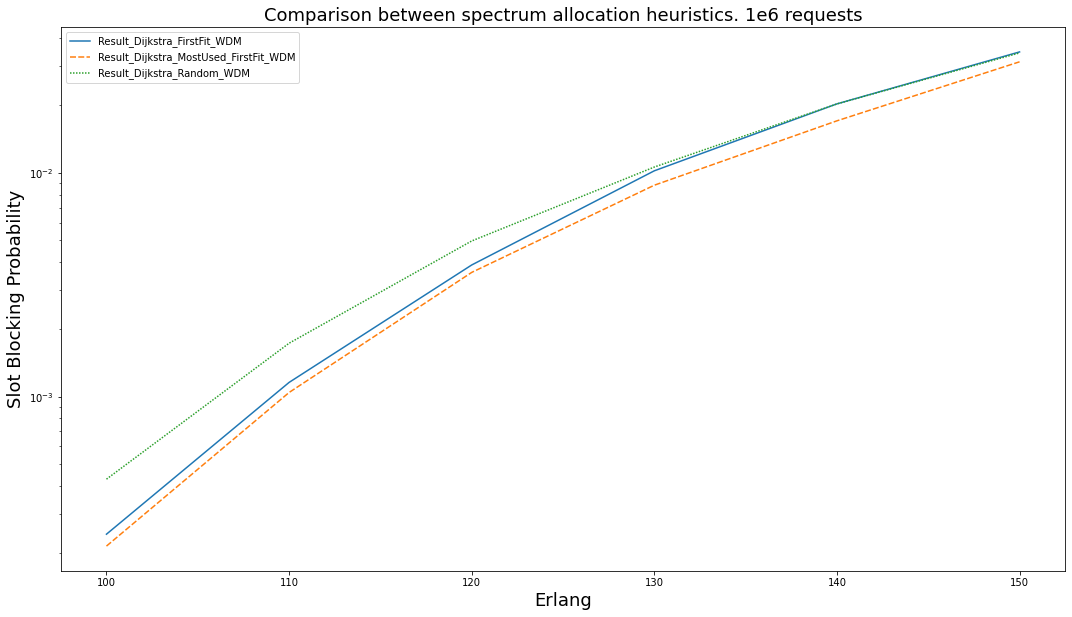

In [30]:
plt.figure(figsize=(18,10))
graph = sns.lineplot(data=dataframe)

graph.set_yscale("log")

plt.title("Comparison between spectrum allocation heuristics. 1e6 requests", fontsize=18)
plt.xlabel("Erlang", fontsize=18)
plt.ylabel("Slot Blocking Probability", fontsize=18)
plt.savefig(".\\imgs\\char.png", dpi = 300, bbox_inches='tight')
plt.show()